stimulus start: 0.0, stimulus end: 1.0
simulating 426 neurons. Start: Sun Jul 10 12:30:02 2022
sim end: Sun Jul 10 12:32:13 2022


INFO       width adjusted from 20. ms to 20.1 ms [brian2.monitors.ratemonitor.adjusted_width]


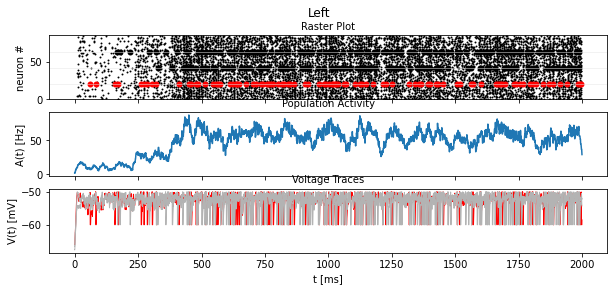

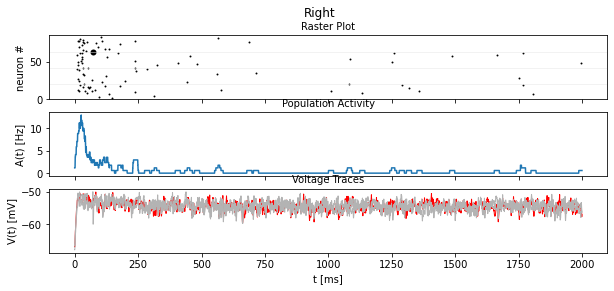

In [1]:
import wang

import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import time

b2.defaultclock.dt = 0.10 * b2.ms

%matplotlib inline
#from neurodynex3.competing_populations import decision_making

"""
A simple example to get started.
Returns:

"""
stim_start = 0. * b2.ms
stim_duration = 1000 * b2.ms
print("stimulus start: {}, stimulus end: {}".format(stim_start, stim_start+stim_duration))

results = wang.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                      t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                      coherence_level=+0.0, w_pos=2.0, mu0_mean_stimulus_Hz=250 * b2.Hz,
                                      max_sim_time=2000. * b2.ms)
plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Left")
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Right")

plt.show()

In [92]:
rmp_A = results["voltage_monitor_A"]

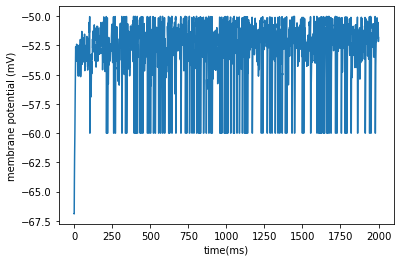

In [96]:
plt.plot(rmp_A[3].t/b2.ms, rmp_A[3].v/b2.mV)
plt.xlabel('time(ms)')
plt.ylabel('membrane potential (mV)')

plt.show()

In [46]:
rmp = results["voltage_monitor_B"]

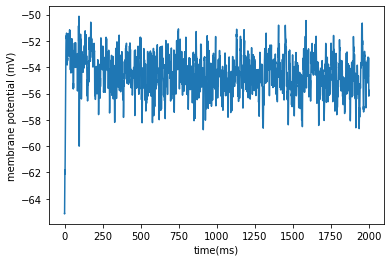

In [97]:
plt.plot(rmp[3].t/b2.ms, rmp[3].v/b2.mV)
plt.xlabel('time(ms)')
plt.ylabel('membrane potential (mV)')
plt.show()


a 안에 몇개의 cell 을 포함하는지 어떻게 아는가? 

In [51]:
spike_mon_b = results["spike_monitor_B"]

In [52]:
print(spike_mon_b.i[:])

[40 59 49 45 78 27 13 25 11 70 78 39 80 19 61 51 48 62 56 72 53 16 79 65
 41 34 76 32 75 20 11 64 76  9 17 41 15 17 26 11 63 12 75 70  3 83 78 23
 67 18 31 56  7 67  2 61 18 73 25 51 10 78 41 37 40  4 45 48 23 57 47 34
 81 12 76 35 11 20 53  9 50 61 19 15 11 57 59 28 62 19  7 48]


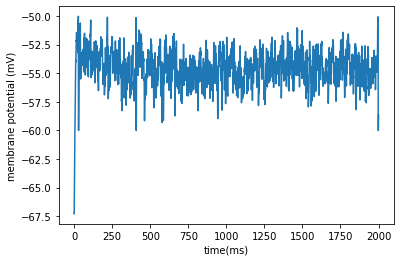

In [98]:
#select one cell and show it's membrane potential monitor
plt.plot(rmp[48].t/b2.ms, rmp[48].v/b2.mV)
plt.xlabel('time(ms)')
plt.ylabel('membrane potential (mV)')
plt.show()


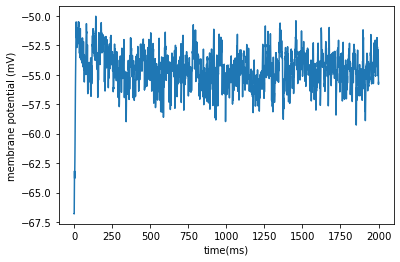

In [103]:
i = non_spike_neurons_list[0]


#select one cell and show it's membrane potential monitor
plt.plot(rmp[i].t/b2.ms, rmp[i].v/b2.mV)
plt.xlabel('time(ms)')
plt.ylabel('membrane potential (mV)')
plt.show()


In [65]:
# spike 가 나타난 neuron 들을 나열하기

spike_neurons = (spike_mon_b.i[:])


cell_nr = np.shape(rmp)
cell_nr = cell_nr[0]

neuron_set = np.arange(cell_nr)

In [68]:
cell_set = set(neuron_set)

In [74]:
non_spike_neurons = cell_set - spike_cell_set

In [75]:
non_spike_neurons

{0,
 1,
 5,
 6,
 8,
 14,
 21,
 22,
 24,
 29,
 30,
 33,
 36,
 38,
 42,
 43,
 44,
 46,
 52,
 54,
 55,
 58,
 60,
 66,
 68,
 69,
 71,
 74,
 77,
 82,
 84}

In [77]:
non_spike_neurons_list = list(non_spike_neurons)


In [84]:
rmp_in_voltage = rmp[i].v/b2.mV

In [86]:
np.mean(rmp_in_voltage)

-54.622015675187356

In [87]:
#select one cell and show it's membrane potential monitor

rmp_mean_list = []
for i in non_spike_neurons_list:
    
    #i = non_spike_neurons_list[6]
    rmp_in_voltage = rmp[i].v/b2.mV
    mean_rmp = np.mean(rmp_in_voltage)
    rmp_mean_list.append(mean_rmp)


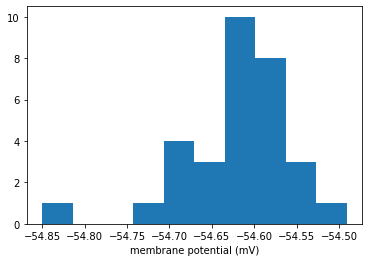

In [102]:
plt.hist(rmp_mean_list)
plt.xlabel('membrane potential (mV)')
plt.show()


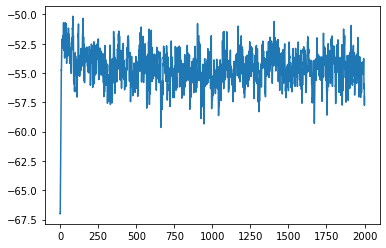

In [83]:
#select one cell and show it's membrane potential monitor

rmp_mean_list = []
for i in non_spike_neurons_list:
    
#i = non_spike_neurons_list[6]
plt.plot(rmp[i].t/b2.ms, rmp[i].v/b2.mV)
rmp_in_voltage = rmp[i].v/b2.mV
mean_rmp = np.mean(rmp_in_voltage)
rmp_mean_list.append(mean_rmp)
plt.show()

In [71]:
spike_neurons - spike_cell_set

array([40, 59, 49, 45, 78, 27, 13, 25, 11, 70, 78, 39, 80, 19, 61, 51, 48,
       62, 56, 72, 53, 16, 79, 65, 41, 34, 76, 32, 75, 20, 11, 64, 76,  9,
       17, 41, 15, 17, 26, 11, 63, 12, 75, 70,  3, 83, 78, 23, 67, 18, 31,
       56,  7, 67,  2, 61, 18, 73, 25, 51, 10, 78, 41, 37, 40,  4, 45, 48,
       23, 57, 47, 34, 81, 12, 76, 35, 11, 20, 53,  9, 50, 61, 19, 15, 11,
       57, 59, 28, 62, 19,  7, 48], dtype=int32)

In [62]:
a[0]

85

In [72]:
spike_cell_set = set(spike_neurons)

(<Figure size 720x288 with 3 Axes>,
 <AxesSubplot:title={'center':'Raster Plot'}, ylabel='neuron #'>,
 <AxesSubplot:title={'center':'Population Activity'}, ylabel='A(t) [Hz]'>,
 <AxesSubplot:title={'center':'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

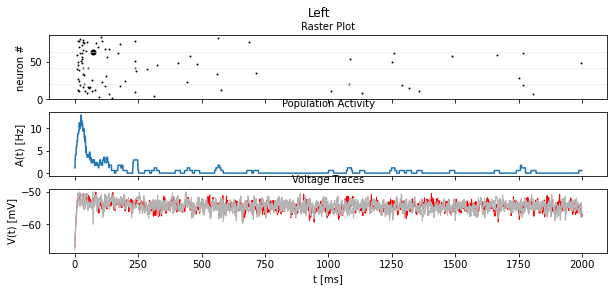

In [17]:
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Left")

In [ ]:
a

In [5]:
from brian2 import *

In [6]:
eqs = '''
dV/dt = (2-V)/(10*ms) : 1
'''
threshold = 'V>1'
reset = 'V = 0'
G = NeuronGroup(100, eqs, threshold=threshold, reset=reset)
G.V = rand(len(G))
M = StateMonitor(G, True, record=range(5))
run(100*ms)
plot(M.t, M.V.T)
show()

WARNING    /Users/minsuyoo/opt/anaconda3/lib/python3.9/site-packages/brian2/units/fundamentalunits.py:2262: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if d is 1 or d is DIMENSIONLESS:
 [py.warnings]
WARNING    /Users/minsuyoo/opt/anaconda3/lib/python3.9/site-packages/brian2/units/fundamentalunits.py:2262: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if d is 1 or d is DIMENSIONLESS:
 [py.warnings]


MagicError: The magic network contains a mix of objects that has been run before and new objects, Brian does not know whether you want to start a new simulation or continue an old one. Consider explicitly creating a Network object. Also note that you can find out which objects will be included in a magic network with the collect() function.